# Simulation by drawing mistake counts

## Set up

In [1]:
# Set up to use local modules
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
sys.path.insert(0, module_path)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

## Simulate

Note: Need to fix the dependent parameter calculations

For each trial it draws a random number of mistakes and then simulates the typing 
speed and accuracy for that trial.
The number of mistakes is a Poisson distribution with some mean mistakeLambda
Each mistake is assumed to take a certain amount of time to correct (normal 
distribution)
The total amount of time to correct all mistakes reduces the final wpm

Simulates a typing text accuracy and speed
There is an unerlying average wpm and accuracy
Mistakes are generated randomly

For each test, simulate the number of mistakes and the resulting wpm due to mistake 
delays
This is a simple simulation: it does not take into account...

In [3]:
# Parameters
avg_wpm = 60  # The average wpm
word_length = 5  # Standardized word length
avg_acc = 0.95  # The average accuracy
duration = 60  # The duration of each test
num_tests = 10000  # The number of tests
# Each mistake has a time delay with a normal distribution
error_mean = 0.1  # The mean of the distribution
error_std = 0.1  # The standard deviation of the distribution

# Dependent parameters
cps_correct = avg_wpm * word_length / 60  # Correct characters per second
cps_incorrect = cps_correct * (1 - avg_acc)  # Incorrect characters per second
cps_total = (cps_correct + cps_incorrect) / (
    1 - (cps_correct * error_mean)
)  # Total clicks per second, including error_cost
# cps_total = (cps_correct+cps_incorrect)
# Mistakes occur as a poisson process
mistakeLambda = cps_total * (1 - avg_acc) * duration

# Set up
wpm = np.zeros(num_tests)  # The wpm for each test
acc = np.zeros(num_tests)  # The accuracy for each test
num_mistakes = np.random.poisson(
    mistakeLambda, num_tests
)  # Number of mistakes for each test

for i in range(num_tests):
    # The number of mistakes
    n = num_mistakes[i]
    # The durations of the mistakes
    times = np.random.normal(error_mean, error_std, n)
    # The wpm for the test
    # wpm[i] = avg_wpm/60 * duration * word_length / (duration + np.sum(times))
    wpm[i] = avg_wpm / 60 * (duration - np.sum(times))
    # The accuracy for the test
    # acc[i] = avg_acc * (duration + np.sum(times)) / duration
    acc[i] = 1 - (n / duration / word_length)

# Print the results
print("Average WPM: " + str(np.mean(wpm)))
print("Average Accuracy: " + str(np.mean(acc)))

Average WPM: 56.84866499291689
Average Accuracy: 0.8948643333333334


## Plot

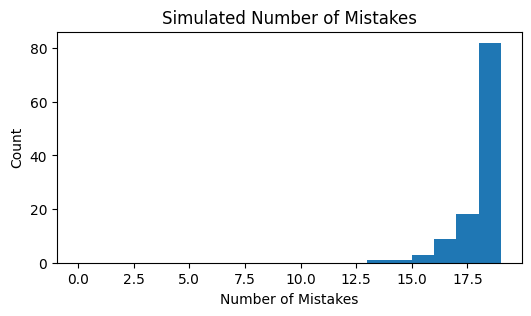

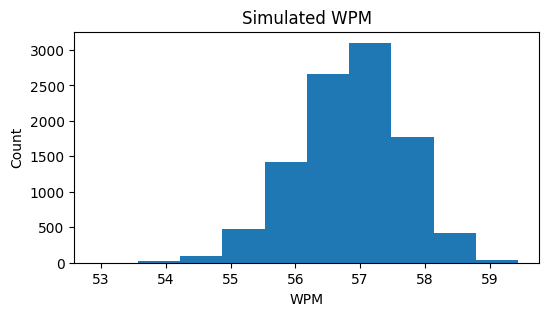

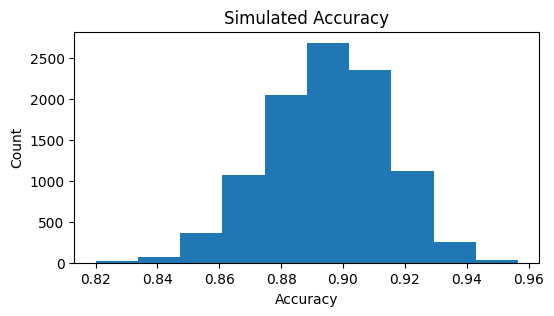

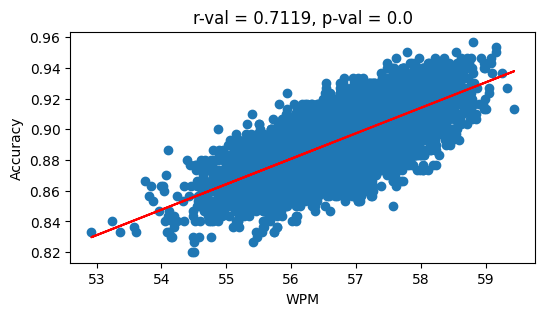

In [4]:
# Plot a histogram of the number of mistakes
plt.figure(figsize=(6, 3))
plt.hist(num_mistakes, bins=range(0, 20))
plt.xlabel("Number of Mistakes")
plt.ylabel("Count")
plt.title("Simulated Number of Mistakes")
plt.show()

# Plot a histogram of the wpm
plt.figure(figsize=(6, 3))
plt.hist(wpm)
plt.xlabel("WPM")
plt.ylabel("Count")
plt.title("Simulated WPM")
plt.show()

# Plot a histogram of the acc
plt.figure(figsize=(6, 3))
plt.hist(acc)
plt.xlabel("Accuracy")
plt.ylabel("Count")
plt.title("Simulated Accuracy")
plt.show()

# Plot wpm v acc
wpm_acc_linregres = scipy.stats.linregress(wpm, acc)
plt.figure(figsize=(6, 3))
plt.scatter(wpm, acc)
plt.plot(
    wpm,
    wpm_acc_linregres.intercept + wpm_acc_linregres.slope * wpm,
    "r",
    label="fitted line",
)
plt.xlabel("WPM")
plt.ylabel("Accuracy")
plt.title("Simulated WPM vs Accuracy")
plt.title(
    "r-val = "
    + str(np.round(wpm_acc_linregres.rvalue, 4))
    + ", p-val = "
    + str(wpm_acc_linregres.pvalue)
)
plt.show()